# Libraries

In [1]:
import os
import re
import glob as g
import math

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

# Files

In [2]:
path = '/data/jackh/plasmepsin/apo_plasmepsin/run'
phs = [2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0]
psf = 'plasmepsin.psf'
sstage = 11
lstage = 65

In [3]:
files = []
for rep, ph in enumerate(phs):
    files_sub = []
    for n in range(sstage, lstage+1):
        files_sub.append('{}/stage{}/*ph{}*dcd*'.format(path, n, ph))
    files.append(files_sub)

In [4]:
for n, ph in enumerate(phs):
    print('Files for pH {}'.format(ph))
    for file in files[n]:
        print(file)

Files for pH 2.0
/data/jackh/plasmepsin/apo_plasmepsin/run/stage11/*ph2.0*dcd*
/data/jackh/plasmepsin/apo_plasmepsin/run/stage12/*ph2.0*dcd*
/data/jackh/plasmepsin/apo_plasmepsin/run/stage13/*ph2.0*dcd*
/data/jackh/plasmepsin/apo_plasmepsin/run/stage14/*ph2.0*dcd*
/data/jackh/plasmepsin/apo_plasmepsin/run/stage15/*ph2.0*dcd*
/data/jackh/plasmepsin/apo_plasmepsin/run/stage16/*ph2.0*dcd*
/data/jackh/plasmepsin/apo_plasmepsin/run/stage17/*ph2.0*dcd*
/data/jackh/plasmepsin/apo_plasmepsin/run/stage18/*ph2.0*dcd*
/data/jackh/plasmepsin/apo_plasmepsin/run/stage19/*ph2.0*dcd*
/data/jackh/plasmepsin/apo_plasmepsin/run/stage20/*ph2.0*dcd*
/data/jackh/plasmepsin/apo_plasmepsin/run/stage21/*ph2.0*dcd*
/data/jackh/plasmepsin/apo_plasmepsin/run/stage22/*ph2.0*dcd*
/data/jackh/plasmepsin/apo_plasmepsin/run/stage23/*ph2.0*dcd*
/data/jackh/plasmepsin/apo_plasmepsin/run/stage24/*ph2.0*dcd*
/data/jackh/plasmepsin/apo_plasmepsin/run/stage25/*ph2.0*dcd*
/data/jackh/plasmepsin/apo_plasmepsin/run/stage26/*ph

### CPPTRAJ

#### SASA masks and criteria

In [5]:
mask1 = ':34&@OD*'

#### Make SASA file 

In [6]:
for n, ph in enumerate(phs):
    with open('cpptraj_run_{}.log'.format(n), 'w') as f:
        f.write('parm {}/{}\n'.format(path, psf))
        for file in files[n]:
            f.write('trajin {}\n'.format(file))
        f.write('surf {} out D34_data/sasa_{}.dat\n'.format(mask1, n))
        f.write('go\n')
        f.write('exit\n')

#### Execute SASA file over a pH range

In [7]:
for n, ph in enumerate(phs):
    exe_cpptraj = 'cpptraj -i cpptraj_run_{}.log'.format(n)
    os.system(exe_cpptraj)
    os.system('rm cpptraj_run_{}.log'.format(n))

### Collect Data

In [8]:
data = []
for n, ph in enumerate(phs):
    data_sub = []
    file = 'D34_data/sasa_{}.dat'.format(n)
    with open(file, 'r') as f:
        for line in f:
            if "#" not in line:
                split_line = re.split(r'\s+', line)
                split_line = split_line[1:-1]
                sasa_val = 0
                if np.float(split_line[1]) > 0:
                    sasa_val = np.float(split_line[1])
                data_sub.append([int(split_line[0]), sasa_val])
    data.append(data_sub)

/home/jackh/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()
/home/jackh/Software/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if sys.path[0] == '':


## Process Data

#### Functions

In [9]:
# pH dependent function 
def ph_depend(pH_list, pH_data, num):
    """
    pH_list: List of pH_values used for Analysis. 
    pH_data: Multidimensional list with all stored data. 
        num: The specific data that you want from your pH_data. 
    """
    ph_depend_data = []
    for n, pH in enumerate(pH_list):
        datum = []
        for dat in pH_data[n]:
            datum.append(dat[num])
        ph_depend_data.append([pH, np.mean(datum), np.std(datum)])
    return ph_depend_data

Save Data

In [10]:
#with open ('6w9c_D11_sasa_phdepend.dat', 'w') as f:
#    ph_data = ph_depend(phs, data, 1)
#    for val in ph_data:
#        f.write("{} {}\n".format(val[0], val[1]))

#### Analysis / Plotting

pH dependence

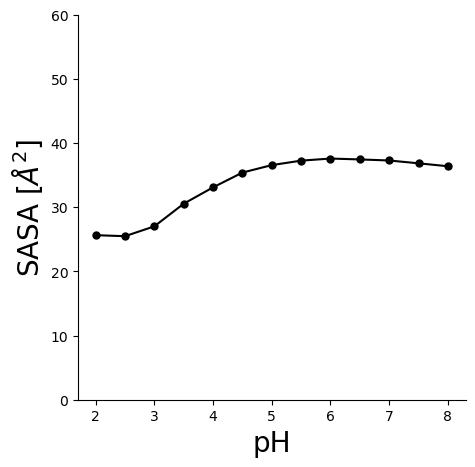

In [11]:
fig, axes = plt.subplots(figsize=(5,5))

axes.set_xlabel('pH', fontsize = 20)
axes.set_ylabel('SASA [$\AA^2$]', fontsize = 20)
axes.plot([x[0] for x in ph_depend(phs, data, 1)], [y[1] for y in ph_depend(phs, data, 1)], 'ko-', markersize=5)
axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)
axes.set_ylim(0, 60)

plt.savefig('wt_sasa_phdepend.pdf'.format(ph))

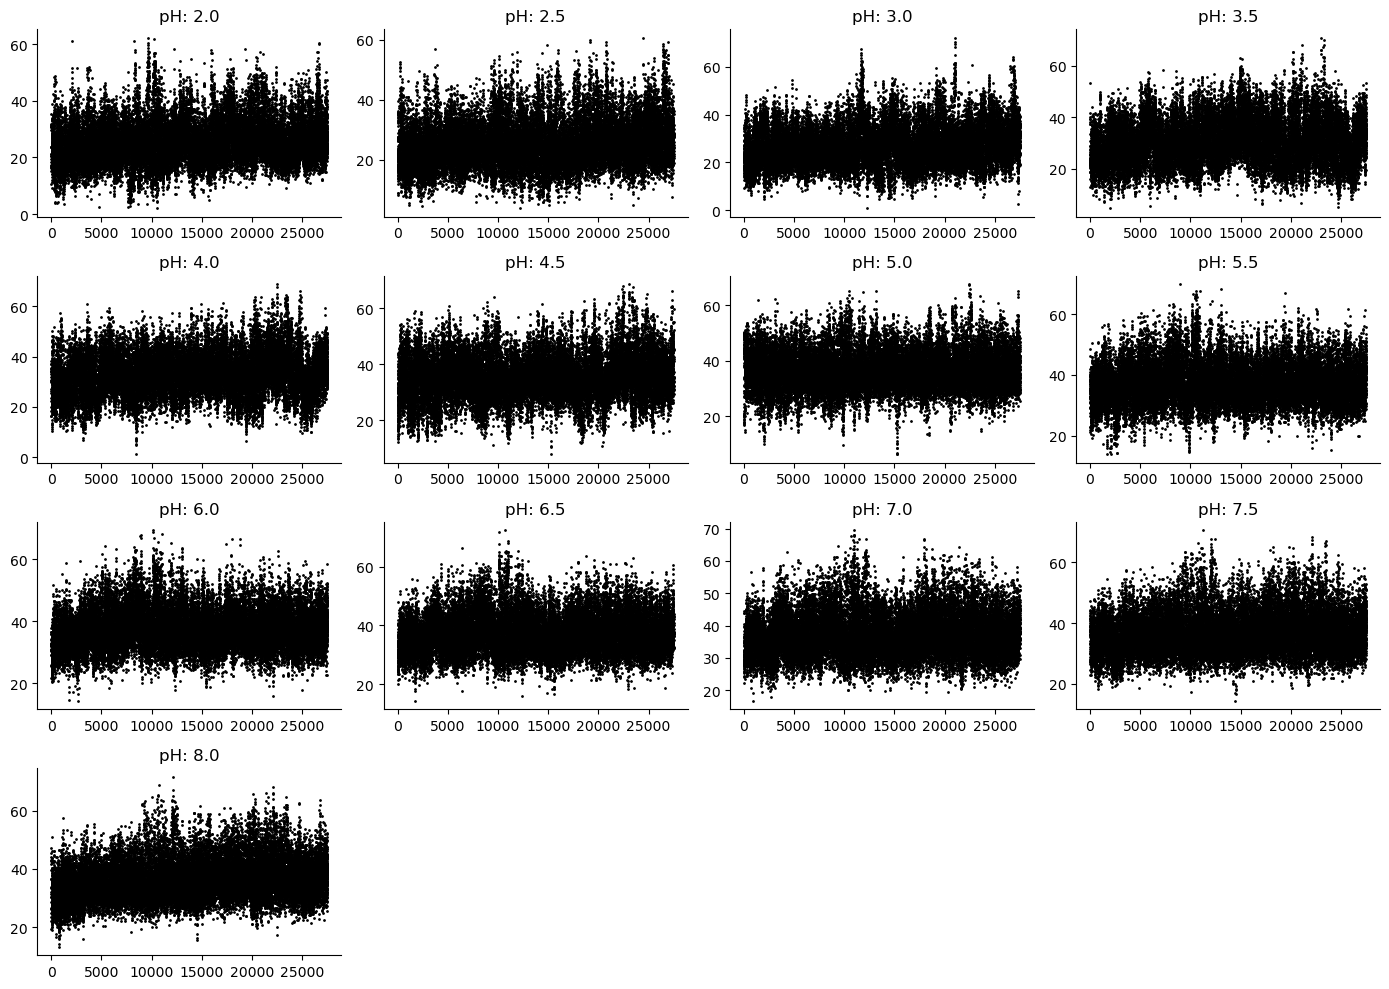

In [12]:
plt.close('all')

figrows = math.ceil(len(phs)/4)
figcols = 4
fig, axes = plt.subplots(nrows = figrows, ncols = figcols, figsize= (14,10/figcols*figrows))
fig.set_facecolor('white')
axes = axes.flatten()
flat_axes = axes.flatten()

remove_count = 0
for i in range(figrows):
    for j in range(figcols):
        index = i * figcols + j
        if index < len(phs):
            axes[index].set_xlabel('')
            axes[index].set_ylabel('')
            axes[index].set_title('pH: {}'.format(phs[index]))
            axes[index].plot([x[0] for x in data[index]], [y[1] for y in data[index]], 'k.', markersize = 2)
            axes[index].spines['top'].set_visible(False)
            axes[index].spines['right'].set_visible(False)
            #axes[index].set_ylim(-1, 10)
        else:
            axes[index].remove()

fig.tight_layout()
plt.show()

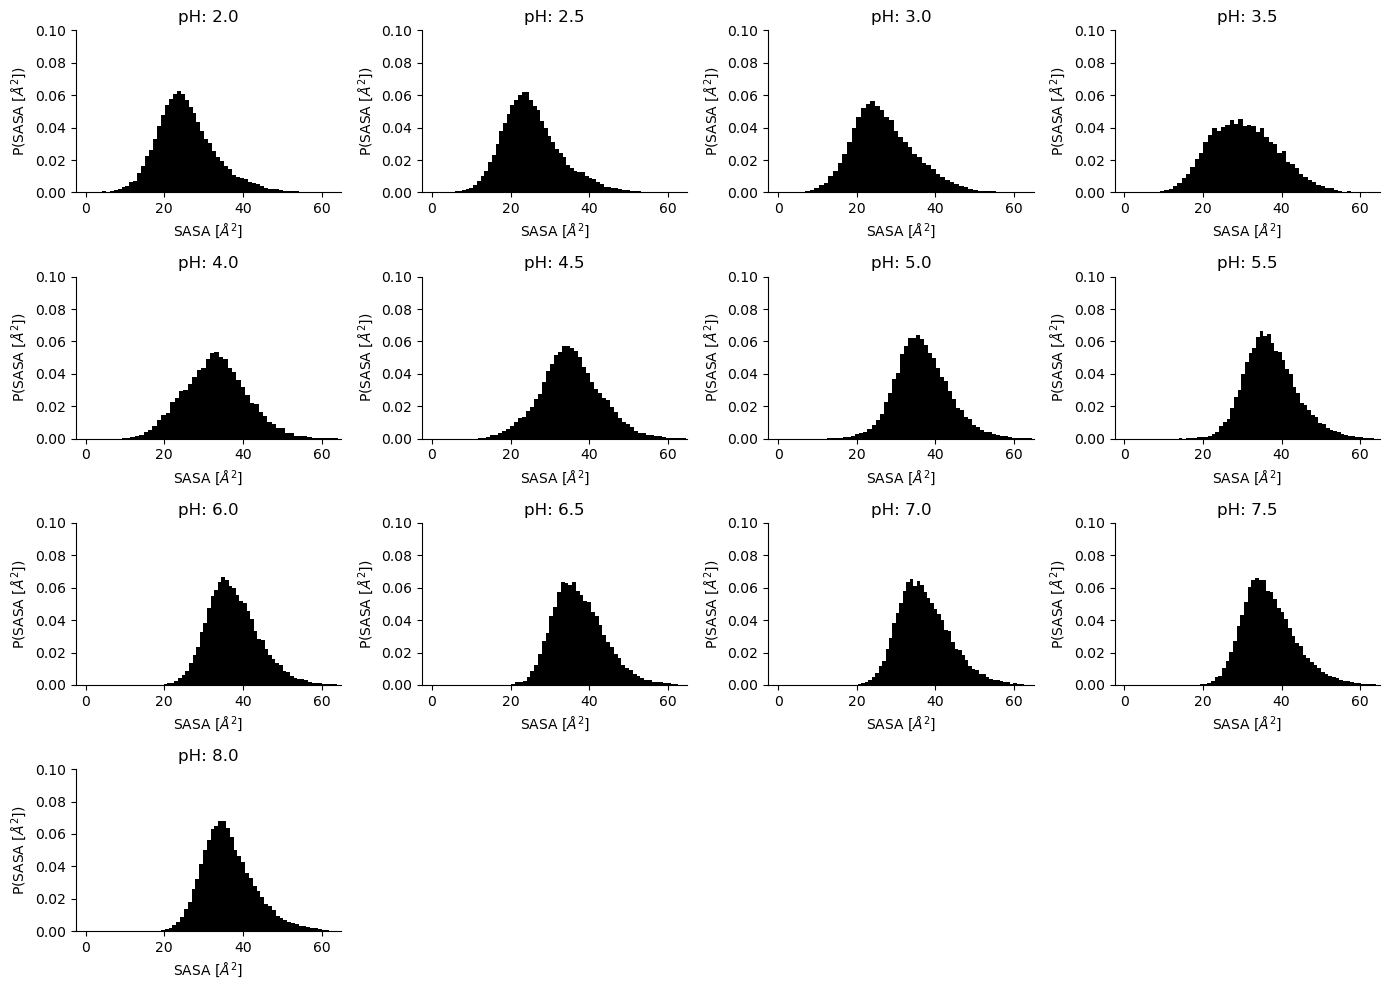

In [13]:
plt.close('all')

figrows = math.ceil(len(phs)/4)
figcols = 4
fig, axes = plt.subplots(nrows = figrows, ncols = figcols, figsize= (14,10/figcols*figrows))
fig.set_facecolor('white')
axes = axes.flatten()
flat_axes = axes.flatten()

remove_count = 0
for i in range(figrows):
    for j in range(figcols):
        index = i * figcols + j
        if index < len(phs):
            axes[index].set_xlabel('SASA [$\AA^2$]')
            axes[index].set_ylabel('P(SASA [$\AA^2$])')
            axes[index].set_title('pH: {}'.format(phs[index]))
            axes[index].hist([x[1] for x in data[index]], bins=60, density=True, color=['black'])
            axes[index].spines['top'].set_visible(False)
            axes[index].spines['right'].set_visible(False)
            axes[index].set_ylim(0, 0.1)
            axes[index].set_xlim(-2.5, 65)
        else:
            axes[index].remove()

fig.tight_layout()
plt.show()